In [20]:
import matplotlib.pyplot as plt
import numpy as np

from flux import *
from xsec import *

import osc

from scipy.integrate import quad
from scipy.interpolate import interp1d

In [2]:
plt.rcParams.update({'font.size': 14})

In [12]:
# Rate of neutrino interactions / dR / dE
# Units: (Number of Interactions) / m / GeV
def rate(flux, xsec, Enu, R, P, baseline):
    costh = np.cos(R/baseline)
    ret = flux(Emuon, P, Enu, costh, baseline)*xsec(Enu)*MASS*(4*np.pi*R*np.sqrt(RADIUS**2 - R**2)/VOLUME)
    if not isinstance(ret, float):
        ret[R > RADIUS] = 0
    elif R > RADIUS:
        return 0
    return ret

def numu_rate(Enu, R, P, B):
    return rate(numu_flux_baseline, xsec, Enu, R, P, B)

def nue_rate(Enu, R, P, B):
    return rate(nue_flux_baseline, xsec, Enu, R, P, B)

def numubar_rate(Enu, R, P, B):
    return rate(numu_flux_baseline, xsecbar, Enu, R, P, B)

def nuebar_rate(Enu, R, P, B):
    return rate(nue_flux_baseline, xsecbar, Enu, R, P, B)

In [59]:
# 500 mega-tonne mass, baseline
MASS = 500e6

# density of water
DENSITY = 1 # t / m^3

VOLUME = MASS / DENSITY
RADIUS = np.power(VOLUME/((4./3.)*np.pi), 1./3.)
Emuon = 5e3

# Unpolarized
P = 0

In [52]:
EPSMUTAU = 0.005

In [32]:
# Possible Baselines

# ICECUBE

# Radius of earth
R_earth = 6371.0 # km

# Chicago latitude
lat = 41.88

# Baseline, approx sphere
alpha = ((90 - lat)/2)*np.pi/180
ICECUBE_BASELINE = np.sqrt(2*R_earth**2*(1 - np.cos((90+lat)*np.pi/180)))*1e3 # meters

PONE_BASELINE = 1758*1.60934*1e3
KM3NeT_BASELINE = 4427*1.60934*1e3

ICECUBE_BASELINE/1e6, PONE_BASELINE/1e6, KM3NeT_BASELINE/1e6

(np.float64(11.634962593570254), 2.82921972, 7.12454818)

(np.float64(0.8725641958522373), np.float64(1.0060363656750742)) 0.9393002807636557


Text(0.5, 0, 'Baseline [km]')

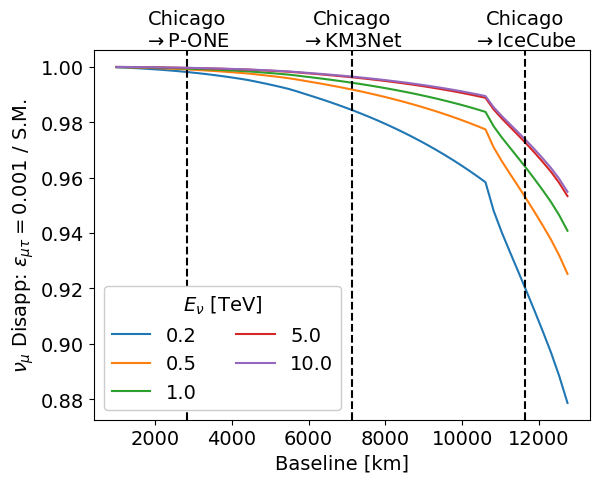

In [84]:
disapps = []
Enu = [0.2e3, 0.5e3, 1e3, 5e3, 10e3]
baselines = np.linspace(1, 6.371*2, 11*5+1)

for baseline in baselines:
    numu_SM = np.abs(osc.oscillate(Enu, baseline*1e6, 1, 1, dL=100))[1].T**2
    numu = np.abs(osc.oscillate(Enu, baseline*1e6, 1, 1, dL=100, epsmutau=EPSMUTAU))[1].T**2

    disapps.append(numu / numu_SM)

plt.plot(baselines*1e3, disapps, label=["%.1f" % (E/1e3) for E in Enu])

plt.axvline(ICECUBE_BASELINE/1e3, color="black", linestyle="--")
plt.axvline(PONE_BASELINE/1e3, color="black", linestyle="--")
plt.axvline(KM3NeT_BASELINE/1e3, color="black", linestyle="--")

ycenter = (plt.ylim()[1] + plt.ylim()[0])/2
print(plt.ylim(), ycenter)
plt.text(ICECUBE_BASELINE/1e3, 1+(1-ycenter)/10,'Chicago\n$\\to$IceCube', verticalalignment="bottom", horizontalalignment="center")
plt.text(PONE_BASELINE/1e3, 1+(1-ycenter)/10,'Chicago\n$\\to$P-ONE', verticalalignment="bottom", horizontalalignment="center")
plt.text(KM3NeT_BASELINE/1e3, 1+(1-ycenter)/10,'Chicago\n$\\to$KM3Net', verticalalignment="bottom", horizontalalignment="center")
# print(ICECUBE_BASELINE/1e6-0.1, ycenter, plt.ylim())

plt.legend(title="$E_\\nu$ [TeV]", ncol=2, framealpha=1)
plt.ylabel("$\\nu_\\mu$ Disapp: $\\epsilon_{\\mu\\tau} = 0.001$ / S.M.")
plt.xlabel("Baseline [km]")

(np.float64(0.9540464135980793), np.float64(1.041621505508609)) 0.9978339595533442


Text(0.5, 0, 'Baseline [km]')

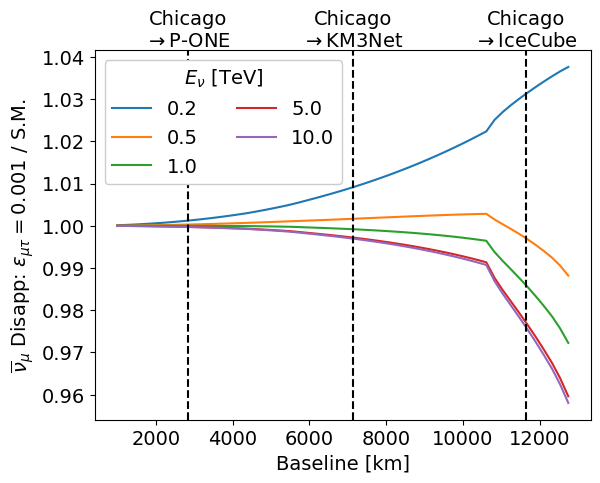

In [34]:
disapps_bar = []

for baseline in baselines:
    numu_SM = np.abs(osc.oscillate(Enu, baseline*1e6, 1, -1, dL=100, epsmutau=0))[1].T**2
    numu = np.abs(osc.oscillate(Enu, baseline*1e6, 1, -1, dL=100, epsmutau=EPSMUTAU))[1].T**2

    disapps_bar.append(numu / numu_SM)

plt.plot(baselines*1e3, disapps_bar, label=["%.1f" % (E/1e3) for E in Enu])

plt.axvline(ICECUBE_BASELINE/1e3, color="black", linestyle="--")
plt.axvline(PONE_BASELINE/1e3, color="black", linestyle="--")
plt.axvline(KM3NeT_BASELINE/1e3, color="black", linestyle="--")

ycenter = (plt.ylim()[1] + plt.ylim()[0])/2
print(plt.ylim(), ycenter)
plt.text(ICECUBE_BASELINE/1e3, plt.ylim()[1]-(1-ycenter)/20,'Chicago\n$\\to$IceCube', verticalalignment="bottom", horizontalalignment="center")
plt.text(PONE_BASELINE/1e3, plt.ylim()[1]-(1-ycenter)/20,'Chicago\n$\\to$P-ONE', verticalalignment="bottom", horizontalalignment="center")
plt.text(KM3NeT_BASELINE/1e3, plt.ylim()[1]-(1-ycenter)/20,'Chicago\n$\\to$KM3Net', verticalalignment="bottom", horizontalalignment="center")
# print(ICECUBE_BASELINE/1e6-0.1, ycenter, plt.ylim())

plt.legend(title="$E_\\nu$ [TeV]", ncol=2, framealpha=1)
plt.ylabel("$\\overline{\\nu}_\\mu$ Disapp: $\\epsilon_{\\mu\\tau} = 0.001$ / S.M.")
plt.xlabel("Baseline [km]")

(np.float64(0.9542805220571734), np.float64(1.002148439368657)) 0.9782144807129152


Text(0.5, 0, 'Baseline [km]')

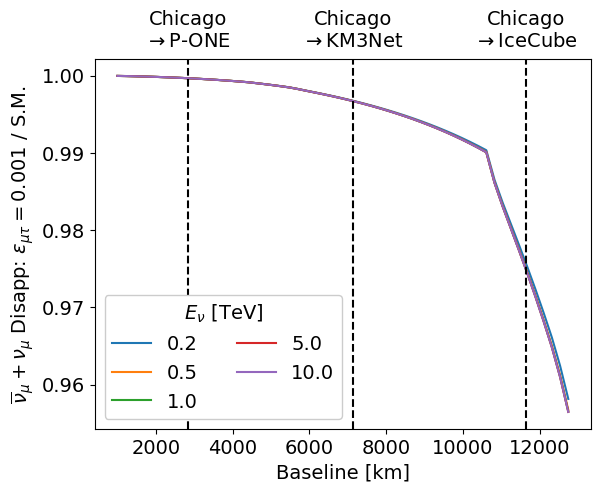

In [35]:
plt.plot(baselines*1e3, (np.array(disapps_bar) + np.array(disapps)) / 2, label=["%.1f" % (E/1e3) for E in Enu])

plt.axvline(ICECUBE_BASELINE/1e3, color="black", linestyle="--")
plt.axvline(PONE_BASELINE/1e3, color="black", linestyle="--")
plt.axvline(KM3NeT_BASELINE/1e3, color="black", linestyle="--")

ycenter = (plt.ylim()[1] + plt.ylim()[0])/2
print(plt.ylim(), ycenter)
plt.text(ICECUBE_BASELINE/1e3, plt.ylim()[1]+(1-ycenter)/20,'Chicago\n$\\to$IceCube', verticalalignment="bottom", horizontalalignment="center")
plt.text(PONE_BASELINE/1e3, plt.ylim()[1]+(1-ycenter)/20,'Chicago\n$\\to$P-ONE', verticalalignment="bottom", horizontalalignment="center")
plt.text(KM3NeT_BASELINE/1e3, plt.ylim()[1]+(1-ycenter)/20,'Chicago\n$\\to$KM3Net', verticalalignment="bottom", horizontalalignment="center")
# print(ICECUBE_BASELINE/1e6-0.1, ycenter, plt.ylim())

plt.legend(title="$E_\\nu$ [TeV]", ncol=2, framealpha=1)
plt.ylabel("$\\overline{\\nu}_\\mu + \\nu_\\mu$ Disapp: $\\epsilon_{\\mu\\tau} = 0.001$ / S.M.")
plt.xlabel("Baseline [km]")

In [86]:
Enu = np.linspace(Emuon/100, Emuon, 100)

In [60]:
numubars = np.zeros(Enu.shape)
nues = np.zeros(Enu.shape)

numus = np.zeros(Enu.shape)
nuebars = np.zeros(Enu.shape)

for i, E in enumerate(Enu):
    numubars[i] = quad(lambda R: numubar_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
    nues[i] = quad(lambda R: nue_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]

    numus[i] = quad(lambda R: numu_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
    nuebars[i] = quad(lambda R: nuebar_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]

/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/1695738073.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nues[i] = quad(lambda R: nue_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/1695738073.py:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nuebars[i] = quad(lambda R: nuebar_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/1695738073.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  numubars[i] = quad(lambda R: numubar_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
/var/

In [87]:
numubars_KM3 = np.zeros(Enu.shape)
nues_KM3 = np.zeros(Enu.shape)

numus_KM3 = np.zeros(Enu.shape)
nuebars_KM3 = np.zeros(Enu.shape)

for i, E in enumerate(Enu):
    numubars_KM3[i] = quad(lambda R: numubar_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
    nues_KM3[i] = quad(lambda R: nue_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]

    numus_KM3[i] = quad(lambda R: numu_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
    nuebars_KM3[i] = quad(lambda R: nuebar_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]

/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/272620953.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nues_KM3[i] = quad(lambda R: nue_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/272620953.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nuebars_KM3[i] = quad(lambda R: nuebar_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/272620953.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  numubars_KM3[i] = quad(lambda R: numubar_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
/

In [62]:
numu_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 1, 1, dL=50, epsmutau=EPSMUTAU))**2
nue_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 0, 1, dL=50, epsmutau=EPSMUTAU))**2
numubar_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 1, -1, dL=50, epsmutau=EPSMUTAU))**2
nuebar_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 0, -1, dL=50, epsmutau=EPSMUTAU))**2

numu_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 1, 1, dL=50, epsmutau=EPSMUTAU))**2
nue_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 0, 1, dL=50, epsmutau=EPSMUTAU))**2
numubar_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 1, -1, dL=50, epsmutau=EPSMUTAU))**2
nuebar_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 0, -1, dL=50, epsmutau=EPSMUTAU))**2

In [63]:
numu_SM_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 1, 1, dL=50))**2
nue_SM_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 0, 1, dL=50))**2
numubar_SM_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 1, -1, dL=50))**2
nuebar_SM_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 0, -1, dL=50))**2

numu_SM_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 1, 1, dL=50))**2
nue_SM_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 0, 1, dL=50))**2
numubar_SM_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 1, -1, dL=50))**2
nuebar_SM_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 0, -1, dL=50))**2

In [64]:
from matplotlib.legend_handler import HandlerBase

class TwoLineLegend(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        if len(orig_handle) == 1:
            return [plt.Line2D([], [], color="white")]
        
        p1 = orig_handle[0][0]
        p2 = orig_handle[1][0]
        c1 = p1.get_color()
        c2 = p2.get_color()
        s1 = p1.get_linestyle()
        s2 = p2.get_linestyle()
        
        l1 = plt.Line2D([x0,y0+width], [height,height], 
                                                linestyle=s1, color=c1)
        l2 = plt.Line2D([x0,y0+width], [0,0], linestyle=s2, color=c2)
        return [l1, l2]

Text(0.585, 1.055, 'SM + $\\epsilon_{\\mu\\tau}$')

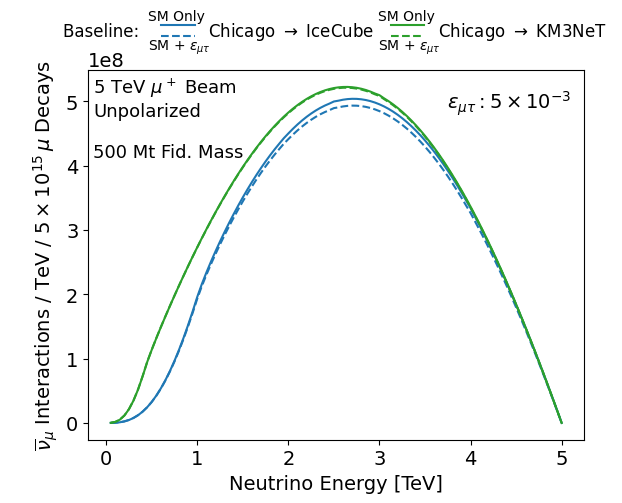

In [102]:
p1 = plt.plot(Enu / 1e3, (nues*nue_SM_ICECUBE[1] + numubars*numubar_SM_ICECUBE[1])*1e3, color="tab:blue")
p2 = plt.plot(Enu / 1e3, (nues*nue_osc_ICECUBE[1] + numubars*numubar_osc_ICECUBE[1])*1e3, 
              color="tab:blue", linestyle="--")

p3 = plt.plot(Enu / 1e3, (nues_KM3*nue_SM_KM3NeT[1] + numubars_KM3*numubar_SM_KM3NeT[1])*1e3, color="tab:green")
p4 = plt.plot(Enu / 1e3, (nues_KM3*nue_osc_KM3NeT[1] + numubars_KM3*numubar_osc_KM3NeT[1])*1e3, 
              color="tab:green", linestyle="--")

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("$\\overline{\\nu}_\\mu$ Interactions / TeV / $5 \\times 10^{15}\\, \\mu$ Decays")
plt.text(0.975, 0.95, "$\\epsilon_{\\mu\\tau}: %i\\times 10^{-3}$" % (EPSMUTAU*1e3),
         transform=plt.gca().transAxes, verticalalignment="top", horizontalalignment="right")
plt.text(0.01, 0.985, "%i TeV $\\mu^+$ Beam\nUnpolarized\n\n%i Mt Fid. Mass" % (Emuon/1e3, MASS/1e6), 
         transform=plt.gca().transAxes, verticalalignment="top", fontsize=13)

p0 = plt.plot([], [])
legend = plt.legend([(p0[0],), (p1, p2), (p3, p4)], ["Baseline: ", "Chicago $\\to$ IceCube", "Chicago $\\to$ KM3NeT"], 
           handler_map={tuple: TwoLineLegend()}, ncol=3, fontsize=12, columnspacing=1, frameon=False,
          loc='upper center', bbox_to_anchor=(0.45, 1.175))

plt.text(0.12, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.12, 1.055, "SM + $\\epsilon_{\\mu\\tau}$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.585, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.585, 1.055, "SM + $\\epsilon_{\\mu\\tau}$", transform=plt.gca().transAxes, fontsize=10)


Text(0.585, 1.055, 'SM + $\\epsilon_{\\mu\\tau}$')

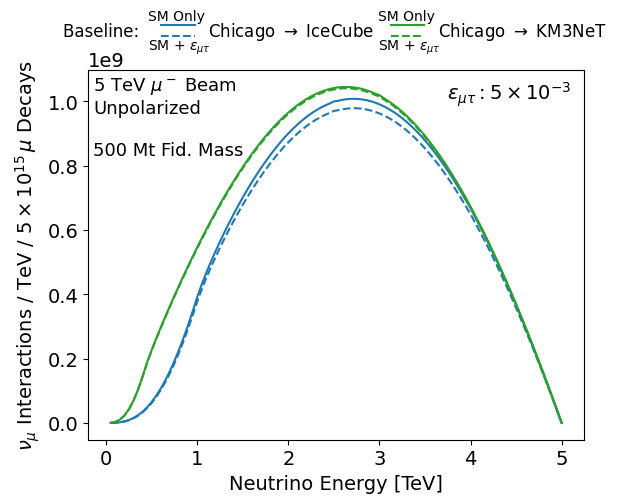

In [101]:
p1 = plt.plot(Enu / 1e3, (nuebars*nuebar_SM_ICECUBE[1] + numus*numu_SM_ICECUBE[1])*1e3, color="tab:blue")
p2 = plt.plot(Enu / 1e3, (nuebars*nuebar_osc_ICECUBE[1] + numus*numu_osc_ICECUBE[1])*1e3, 
              color="tab:blue", linestyle="--")

p3 = plt.plot(Enu / 1e3, (nuebars_KM3*nuebar_SM_KM3NeT[1] + numus_KM3*numu_SM_KM3NeT[1])*1e3, color="tab:green")
p4 = plt.plot(Enu / 1e3, (nuebars_KM3*nuebar_osc_KM3NeT[1] + numus_KM3*numu_osc_KM3NeT[1])*1e3, 
              color="tab:green", linestyle="--")

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("$\\nu_\\mu$ Interactions / TeV / $5 \\times 10^{15}\\, \\mu$ Decays")
plt.text(0.975, 0.975, "$\\epsilon_{\\mu\\tau}: %i\\times 10^{-3}$" % (EPSMUTAU*1e3),
         transform=plt.gca().transAxes, verticalalignment="top", horizontalalignment="right")
plt.text(0.01, 0.985, "%i TeV $\\mu^-$ Beam\nUnpolarized\n\n%i Mt Fid. Mass" % (Emuon/1e3, MASS/1e6), 
         transform=plt.gca().transAxes, verticalalignment="top", fontsize=13)

p0 = plt.plot([], [])
legend = plt.legend([(p0[0],), (p1, p2), (p3, p4)], ["Baseline: ", "Chicago $\\to$ IceCube", "Chicago $\\to$ KM3NeT"], 
           handler_map={tuple: TwoLineLegend()}, ncol=3, fontsize=12, columnspacing=1, frameon=False,
          loc='upper center', bbox_to_anchor=(0.45, 1.175))

plt.text(0.12, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.12, 1.055, "SM + $\\epsilon_{\\mu\\tau}$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.585, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.585, 1.055, "SM + $\\epsilon_{\\mu\\tau}$", transform=plt.gca().transAxes, fontsize=10)


In [66]:
numu_to_numu_ICECUBE = interp1d(Enu, numu_osc_ICECUBE[1])
nue_to_numu_ICECUBE = interp1d(Enu, nue_osc_ICECUBE[1])

numubar_to_numubar_ICECUBE = interp1d(Enu, numubar_osc_ICECUBE[1])
nuebar_to_numubar_ICECUBE = interp1d(Enu, nuebar_osc_ICECUBE[1])

numu_to_numu_SM_ICECUBE = interp1d(Enu, numu_SM_ICECUBE[1])
nue_to_numu_SM_ICECUBE = interp1d(Enu, nue_SM_ICECUBE[1])

numubar_to_numubar_SM_ICECUBE = interp1d(Enu, numubar_SM_ICECUBE[1])
nuebar_to_numubar_SM_ICECUBE = interp1d(Enu, nuebar_SM_ICECUBE[1])

numu_to_numu_KM3NeT = interp1d(Enu, numu_osc_KM3NeT[1])
nue_to_numu_KM3NeT = interp1d(Enu, nue_osc_KM3NeT[1])

numubar_to_numubar_KM3NeT = interp1d(Enu, numubar_osc_KM3NeT[1])
nuebar_to_numubar_KM3NeT = interp1d(Enu, nuebar_osc_KM3NeT[1])

numu_to_numu_SM_KM3NeT = interp1d(Enu, numu_SM_KM3NeT[1])
nue_to_numu_SM_KM3NeT = interp1d(Enu, nue_SM_KM3NeT[1])

numubar_to_SM_numubar_KM3NeT = interp1d(Enu, numubar_SM_KM3NeT[1])
nuebar_to_SM_numubar_KM3NeT = interp1d(Enu, nuebar_SM_KM3NeT[1])

In [69]:
Rs = np.linspace(0, RADIUS, 50)

numuICESM_per_Rs = np.zeros(Rs.shape)
numuICE_per_Rs = np.zeros(Rs.shape)

numuKM3SM_per_Rs = np.zeros(Rs.shape)
numuKM3_per_Rs = np.zeros(Rs.shape)

for i, R in enumerate(Rs):
    numuICESM_per_Rs[i] = quad(lambda E: numu_rate(E, R, P, ICECUBE_BASELINE)*numu_to_numu_SM_ICECUBE(E), Emuon/100, Emuon)[0]
    
    numuICE_per_Rs[i] = quad(lambda E: numu_rate(E, R, P, ICECUBE_BASELINE)*numu_to_numu_ICECUBE(E), Emuon/100, Emuon)[0] +\
        quad(lambda E: nue_rate(E, R, -1, ICECUBE_BASELINE)*nue_to_numu_ICECUBE(E), Emuon/100, Emuon)[0]

    numuKM3SM_per_Rs[i] = quad(lambda E: numu_rate(E, R, P, KM3NeT_BASELINE)*numu_to_numu_SM_KM3NeT(E), Emuon/100, Emuon)[0]
    
    numuKM3_per_Rs[i] = quad(lambda E: numu_rate(E, R, P, KM3NeT_BASELINE)*numu_to_numu_KM3NeT(E), Emuon/100, Emuon)[0] +\
        quad(lambda E: nue_rate(E, R, -1, KM3NeT_BASELINE)*nue_to_numu_KM3NeT(E), Emuon/100, Emuon)[0]

/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/690675291.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda E: nue_rate(E, R, -1, KM3NeT_BASELINE)*nue_to_numu_KM3NeT(E), Emuon/100, Emuon)[0]
/var/folders/1z/v8_t72qj03qg3h2yn9_ynx0m0000j7/T/ipykernel_11573/690675291.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity,

Text(0.585, 1.055, 'SM + $\\epsilon_{\\mu\\tau}$')

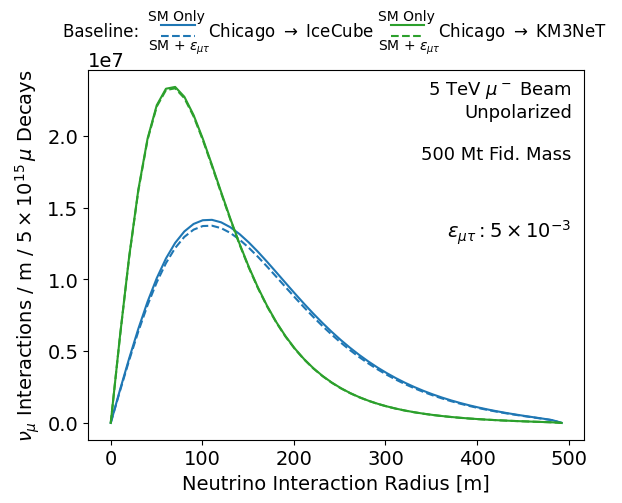

In [105]:
p1 = plt.plot(Rs, numuICESM_per_Rs, label="S.M. IceCube", color="tab:blue")
p2 = plt.plot(Rs, numuICE_per_Rs, label="$\\nu_S$ IceCube", color="tab:blue", linestyle="--")

p3 = plt.plot(Rs, numuKM3SM_per_Rs, label="S.M. KM3Net", color="tab:green")
p4 = plt.plot(Rs, numuKM3_per_Rs, label="$\\nu_S$ KM3Net", color="tab:green", linestyle="--")

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel("Neutrino Interaction Radius [m]")
plt.ylabel("$\\nu_\\mu$ Interactions / m / $5 \\times 10^{15}\\, \\mu$ Decays")
plt.text(0.975, 0.6, "$\\epsilon_{\\mu\\tau}: %i\\times 10^{-3}$" % (EPSMUTAU*1e3),
         transform=plt.gca().transAxes, verticalalignment="top", horizontalalignment="right")

plt.text(0.975, 0.975, "%i TeV $\\mu^-$ Beam\nUnpolarized\n\n%i Mt Fid. Mass" % (Emuon/1e3, MASS/1e6), 
         transform=plt.gca().transAxes, verticalalignment="top", horizontalalignment="right", fontsize=13)

p0 = plt.plot([], [])
legend = plt.legend([(p0[0],), (p1, p2), (p3, p4)], ["Baseline: ", "Chicago $\\to$ IceCube", "Chicago $\\to$ KM3NeT"], 
           handler_map={tuple: TwoLineLegend()}, ncol=3, fontsize=12, columnspacing=1, frameon=False,
          loc='upper center', bbox_to_anchor=(0.45, 1.175))

plt.text(0.12, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.12, 1.055, "SM + $\\epsilon_{\\mu\\tau}$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.585, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.585, 1.055, "SM + $\\epsilon_{\\mu\\tau}$", transform=plt.gca().transAxes, fontsize=10)
